### Load Database

In [67]:
import Complete_crypto_dtb
Dtb = Complete_crypto_dtb.Dtb_crypto_historic(resolution='min')
Dtb.df.head(5)

,BTC-EUR,ETH-EUR,ETC-EUR,LTC-EUR
1622000520,32066.95,2304.53,65.178,155.25
1622000580,32077.00,2307.56,65.271,155.25
1622000640,32104.66,2311.30,65.425,155.44
1622000700,32097.26,2306.66,65.537,155.81
1622000760,32145.76,2315.90,65.649,156.09


### Preprocessing prototype for timestep


In [ ]:
from sklearn.preprocessing import StandardScaler
Database_crypto = Dtb.df.copy()

# Using pourcentage change instead of raw value to be independant during training
for col in Database_crypto.columns:
    Database_crypto[col]=Database_crypto[col].pct_change()
Database_crypto.fillna(0, inplace=True) # 0 percent at first line

### Normalize
std = StandardScaler()
std.fit(Database_crypto) # Use fit that will later be saved for RL preprocessing
X = std.transform(Database_crypto)
X_invert = std.inverse_transform(X)
print(std.mean_)
print(std.scale_)

### Verify that preprocessing is coherent

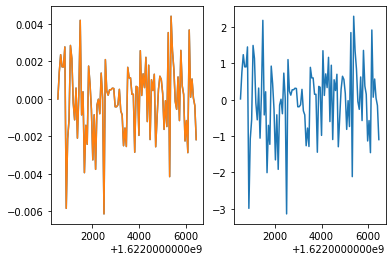

In [76]:
import matplotlib.pyplot as plt

idx_col = 2
t = Dtb.df.index
fig, sp = plt.subplots(ncols=2, sharex=True)
sp[0].plot(Database_crypto[Dtb.df.columns[idx_col]])
sp[0].plot(t, X_invert[:,idx_col])
sp[1].plot(t, X[:,idx_col])

## Function of Preprocess

In [ ]:
def preprocess_df(df, seq_len=60):
    ### Normalize
    std = StandardScaler()
    std.fit(df)
    df_normalized = std.transform(df)

    ### Create Sequences
    sequential_data = []
    prev_days = deque(maxlen=seq_len)
    for crypto_historic in df.values:  # iterate over the values
        prev_days.append([v for v in crypto_historic[:-1]])  # store all except the target prediction
        if len(prev_days) == SEQ_LEN:
            sequential_data.append([np.array(prev_days), crypto_historic[-1]])  # append those bad boys!
    return sequences, targets, std

def postprocess(sequence, std):
    return std.inverse_transform(sequence)